# Amazon Title Reviews Sentiment - Bidirectional LSTM

In [81]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")
import seaborn as sns
sns.set_style("darkgrid")
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
import re, string, nltk
import emoji, bz2
from nltk.stem import *
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Bidirectional, Dropout
from keras.layers import Embedding
from keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

In [82]:
#New Model imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, GRU, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

In [83]:
df = pd.read_csv("dataset/amazon_review.csv")
df.head()

,Unnamed: 0,review,sentiment
0,1959029,I just adopted a chocolate lab who loves to sn...,1
1,971879,Watched it and wasn't very impressed. It was t...,0
2,44681,"By 1967, enough was enough with the light fluf...",0
3,793119,I was interested in what all the hype was abou...,0
4,2921599,I expected a well written book (as someone rec...,0


In [84]:
df = df[["review","sentiment"]]
df

,review,sentiment
0,I just adopted a chocolate lab who loves to sn...,1
1,Watched it and wasn't very impressed. It was t...,0
2,"By 1967, enough was enough with the light fluf...",0
3,I was interested in what all the hype was abou...,0
4,I expected a well written book (as someone rec...,0
...,...,...
100795,I purchased this product for my 1 year old twi...,0
100796,"When reading this book, you will probably find...",1
100797,This video has some really great tunes the muc...,1
100798,"I did finish the movie, but it was only rallyi...",0


In [85]:
# shape of data
print(f"Data consists of {df.shape[0]} rows and {df.shape[1]} columns.")

Data consists of 100800 rows and 2 columns.


In [86]:
# checking for null values
df.isna().sum()

review       0
sentiment    0
dtype: int64

In [87]:
# dropping null values
df = df.dropna()

In [88]:
# checking for any duplicate in the data
df.duplicated().sum()

4

In [89]:
df1 = df
df1.shape

(100800, 2)

In [90]:
df1.sentiment.value_counts()

sentiment
1    50515
0    50285
Name: count, dtype: int64

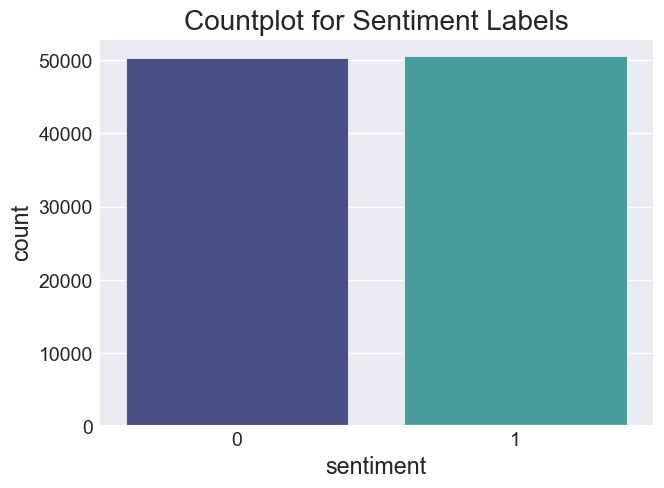

In [91]:
#
sns.countplot(x='sentiment', data=df1, palette='mako')
plt.title("Countplot for Sentiment Labels")
plt.show()

* Classes are balanced. So, no need for oversampling or undersampling the target column.

# Cleaning Data

In [92]:
def clean_text(df, field):
    df[field] = df[field].str.replace(r"@"," at ")
    df[field] = df[field].str.replace("#[^a-zA-Z0-9_]+"," ")
    df[field] = df[field].str.replace(r"[^a-zA-Z(),\"'\n_]"," ")
    df[field] = df[field].str.replace(r"http\S+","")
    df[field] = df[field].str.lower()
    return df

clean_text(df1,"review")

,review,sentiment
0,i just adopted a chocolate lab who loves to sn...,1
1,watched it and wasn't very impressed. it was t...,0
2,"by 1967, enough was enough with the light fluf...",0
3,i was interested in what all the hype was abou...,0
4,i expected a well written book (as someone rec...,0
...,...,...
100795,i purchased this product for my 1 year old twi...,0
100796,"when reading this book, you will probably find...",1
100797,this video has some really great tunes the muc...,1
100798,"i did finish the movie, but it was only rallyi...",0


In [93]:
# Applying Lemmmatizer to remove tenses from texts.
import nltk
nltk.download('wordnet')
nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()
i=0
def preprocess_text(text):
    global i
    if i%100==0:
        print(i)
    i+=1
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub('[^a-zA-Z0-9]',' ',text)
    #text= re.sub(emoji.get_emoji_regexp(),"",text)
    # Remove emojis using a regular expression
    text = re.sub(r'\[.*?\]', '', text)
    text = [lemmatizer.lemmatize(word) for word in text.split() if not word in set(stopwords.words('english'))]
    text = ' '.join(text)
    return text

df1["clean_review"] = df1["review"].apply(preprocess_text)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mo0n1\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mo0n1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
18100
18200
18300
18400
18

In [94]:
df1.to_csv('cleanreview.csv', index=False)
df1 = pd.read_csv("cleanreview.csv")
df1.head(15)

,review,sentiment,clean_review
0,i just adopted a chocolate lab who loves to sn...,1,adopted chocolate lab love snuggle rub furnitu...
1,watched it and wasn't very impressed. it was t...,0,watched impressed taken 30 min le 70 tv show c...
2,"by 1967, enough was enough with the light fluf...",0,1967 enough enough light fluff comedy starring...
3,i was interested in what all the hype was abou...,0,interested hype like book nicely banded pretty...
4,i expected a well written book (as someone rec...,0,expected well written book someone recommended...
5,this is a great little feeder for a window. si...,1,great little feeder window simple basic design...
6,i know that everyone thinks that the exorcist ...,0,know everyone think exorcist best film ever ma...
7,twp of my favorite stars -- clair danes and je...,0,twp favorite star clair dane jennifer lopez to...
8,this item was ordered for me as a birthday gif...,0,item ordered birthday gift june september stil...
9,"the product was shipped in good time, but i wa...",0,product shipped good time dissappointed tea re...


In [95]:
print(df1.columns)


Index(['review', 'sentiment', 'clean_review'], dtype='object')


Text(0, 0.5, 'Text Length')

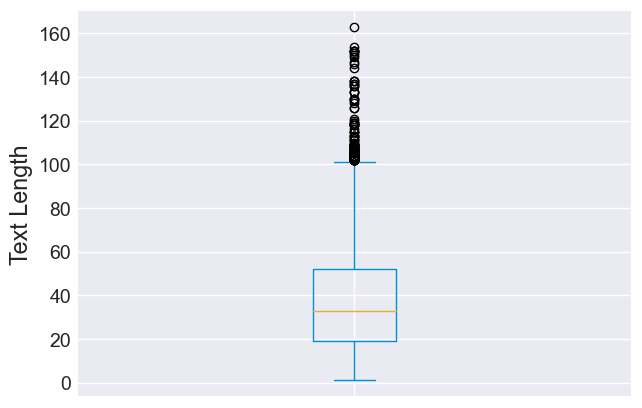

In [96]:
text_length = pd.Series([len(review.split()) for review in df1["clean_review"]])
text_length.plot(kind="box")
plt.ylabel("Text Length")

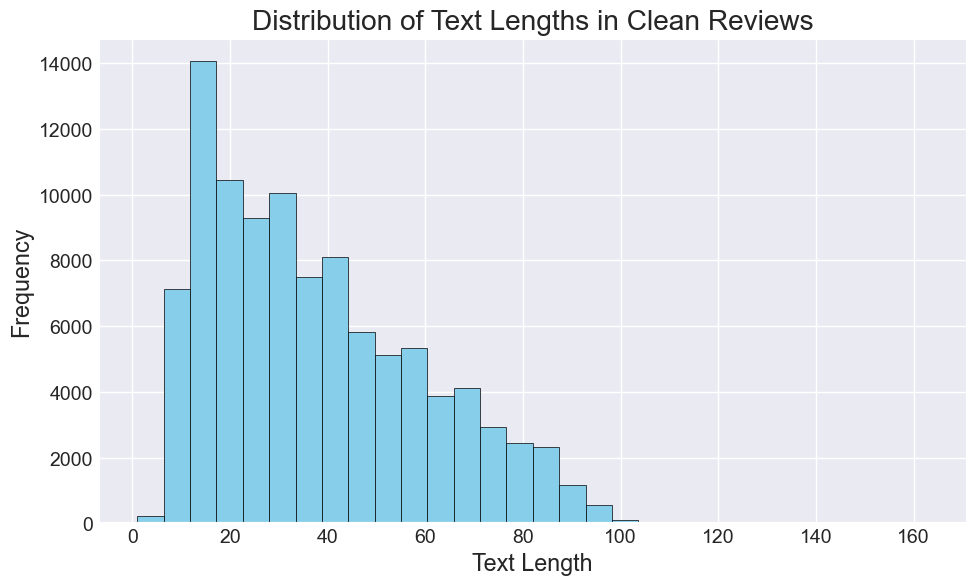

In [97]:
text_length = [len(review.split()) for review in df1["clean_review"]]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(text_length, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths in Clean Reviews')
plt.grid(True)
plt.show()

### WordClouds
* Useful for viewing and analyzing words that are frequently used.

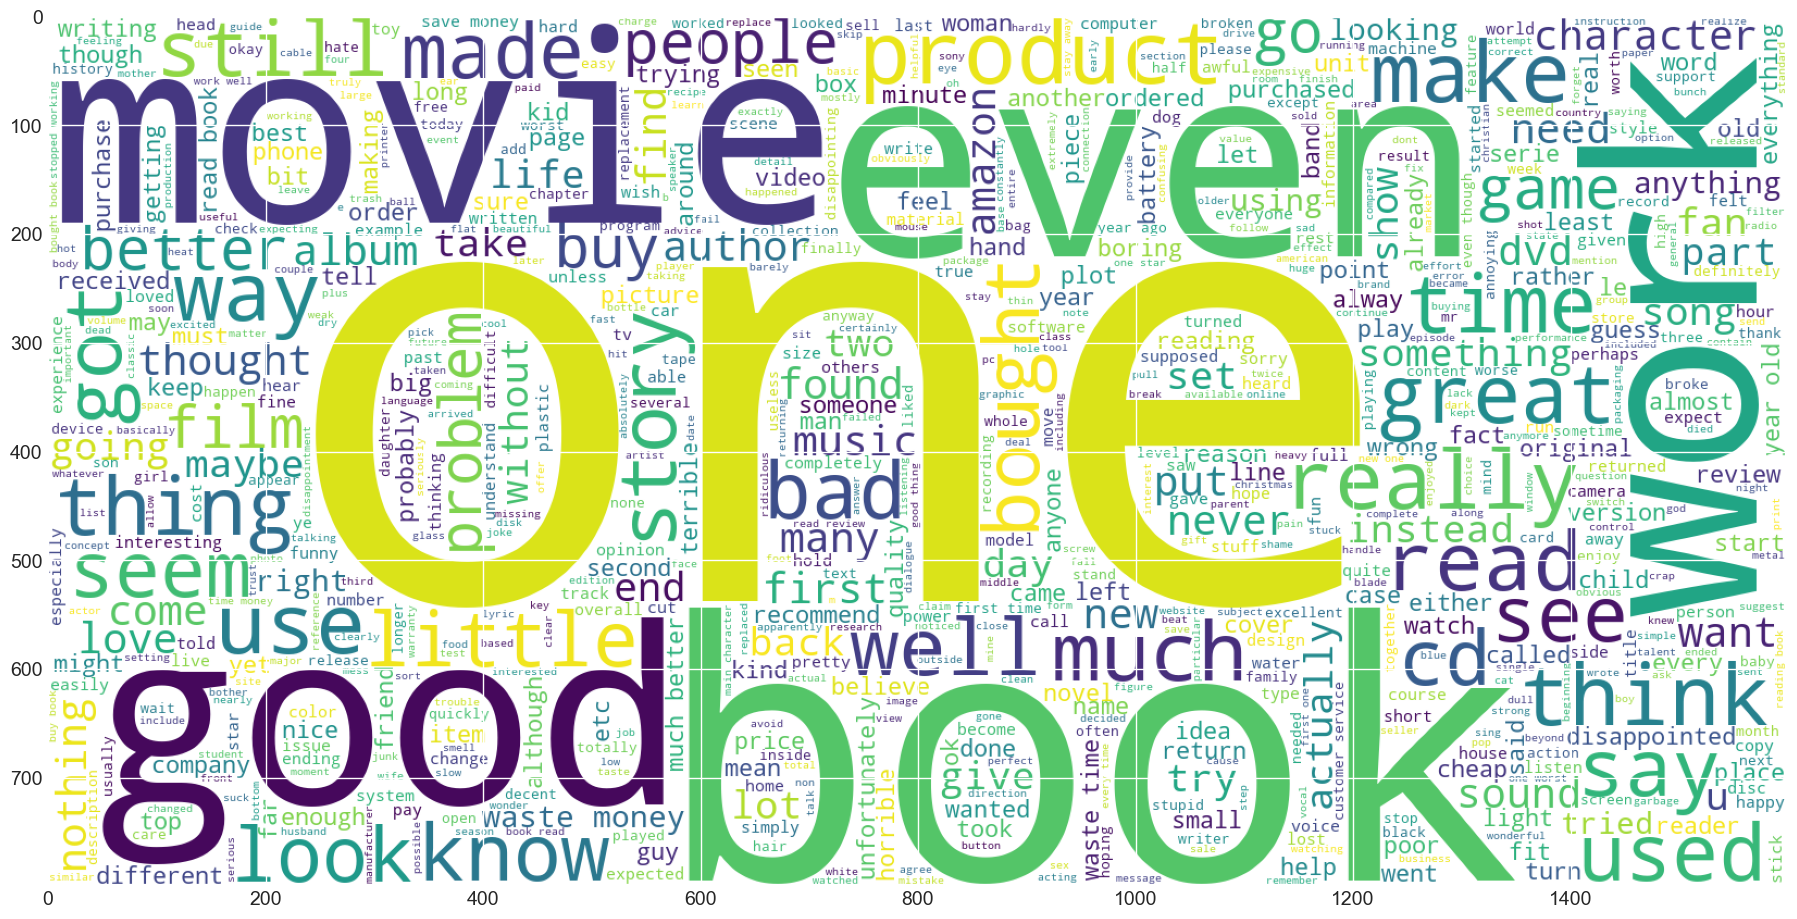

In [98]:
# Negative Review WordCloud
plt.figure(figsize=(20,20))
wc1 = WordCloud(max_words=2000,min_font_size=10, height=800, width=1600, 
               background_color="white").generate(" ".join(df[df["sentiment"]==0].clean_review))
plt.imshow(wc1)

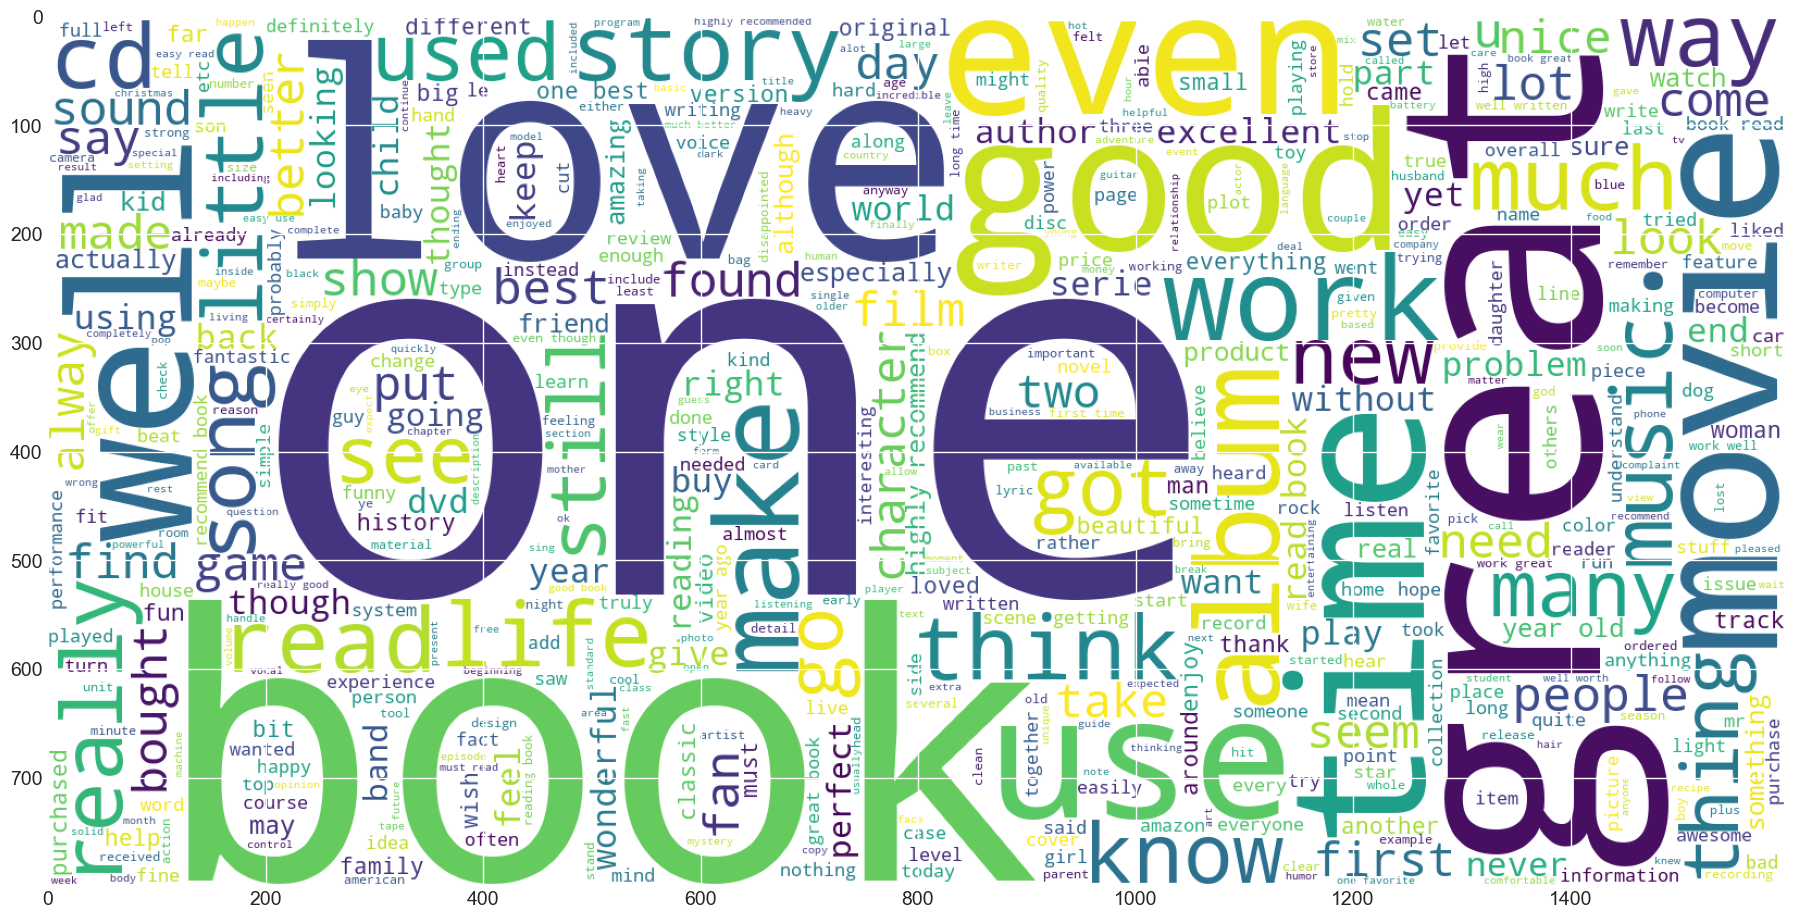

In [99]:
# Positive Review WordCloud
plt.figure(figsize=(20,20))
wc = WordCloud(max_words=2000,min_font_size=10, height=800, width=1600, 
               background_color="white").generate(" ".join(df[df["sentiment"]==1].clean_review))
plt.imshow(wc)

In [102]:
df = df1[["sentiment","clean_review"]]
df.head(10)

,sentiment,clean_review
0,1,adopted chocolate lab love snuggle rub furnitu...
1,0,watched impressed taken 30 min le 70 tv show c...
2,0,1967 enough enough light fluff comedy starring...
3,0,interested hype like book nicely banded pretty...
4,0,expected well written book someone recommended...
5,1,great little feeder window simple basic design...
6,0,know everyone think exorcist best film ever ma...
7,0,twp favorite star clair dane jennifer lopez to...
8,0,item ordered birthday gift june september stil...
9,0,product shipped good time dissappointed tea re...


In [103]:
df.sentiment.unique()

array([1, 0], dtype=int64)

In [ ]:
#new Model Tokenization
# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['clean_review'])
max_len = max(len(seq) for seq in X)

X = tokenizer.texts_to_sequences(df['clean_review'])
X = pad_sequences(X, maxlen=max_len)  # Set appropriate maxlen for padding

y = df['sentiment']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model Training

In [31]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['clean_review'])

# Vocabulary size (number of unique words)
num_words = len(tokenizer.word_index) + 1  # Adding 1 for the <OOV> (Out of Vocabulary) token

# Define other necessary parameters (e.g., embedding dimension, maximum sequence length)
embedding_dim = 64
max_len = 100  # Adjust this based on your desired sequence length

# Convert text data to sequences and pad sequences
X = tokenizer.texts_to_sequences(df['clean_review'])
X = pad_sequences(X, maxlen=max_len)
y = df['sentiment']

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
#GRU model training
# Define GRU model
from keras.models import Sequential
from keras.layers import Embedding, GRU, Dense

# Define GRU model
gru_model = Sequential()
gru_model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, input_shape=(max_len,))) # Specify input shape here
gru_model.add(GRU(64, dropout=0.2, recurrent_dropout=0.2))
gru_model.add(Dense(1, activation='sigmoid'))

# Compile the model
gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
gru_model.summary()

# Train the model
gru_history = gru_model.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.1)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ (None, 100, 64)        │     6,762,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 64)             │        24,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,787,265 (25.89 MB)

 Trainable params: 6,787,265 (25.89 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
2268/2268 ━━━━━━━━━━━━━━━━━━━━ 153s 66ms/step - accuracy: 0.7335 - loss: 8.9403 - val_accuracy: 0.7593 - val_loss: 0.4952
Epoch 2/200
2268/2268 ━━━━━━━━━━━━━━━━━━━━ 150s 66ms/step - accuracy: 0.8614 - loss: 0.3352 - val_accuracy: 0.7586 - val_loss: 0.4895
Epoch 3/200
2268/2268 ━━━━━━━━━━━━━━━━━━━━ 149s 66ms/step - accuracy: 0.8878 - loss: 0.2778 - val_accuracy: 0.7509 - val_loss: 0.4977
Epoch 4/200
2268/2268 ━━━━━━━━━━━━━━━━━━━━ 149s 66ms/step - accuracy: 0.9085 - loss: 0.2324 - val_accuracy: 0.7608 - val_loss: 0.5023
Epoch 5/200
2268/2268 ━━━━━━━━━━━━━━━━━━━━ 150s 66ms/step - accuracy: 0.9227 - loss: 0.4230 - val_accuracy: 0.7489 - val_loss: 0.5223
Epoch 6/200
2268/2268 ━━━━━━━━━━━━━━━━━━━━ 149s 66ms/step - accuracy: 0.9344 - loss: 13.4070 - val_accuracy: 0.6885 - val_loss: 0.5809
Epoch 7/200
2268/2268 ━━━━━━━━━━━━━━━━━━━━ 149s 66ms/step - accuracy: 0.8588 - loss: 1.5050 - val_accuracy: 0.7158 - val_loss: 0.5638
Epoch 8/200
2268/2268 ━━━━━━━━━━━━━━━━━━━━ 149s 66ms/step - a

In [94]:
#GRU model accuracy chart
# Tokenize and pad input sequences for GRU model
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_test_seq_padded = pad_sequences(X_test_seq, maxlen=max_len)

# Get predictions from the GRU model
y_pred = (gru_model.predict(X_test_seq_padded) > 0.5).astype("int32")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)

# Generate classification report
report = classification_report(y_test, y_pred)

# Display evaluation results
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"ROC AUC Score: {roc_auc:.4f}")
print("Classification Report:\n", report)


788/788 [==============================] - 35s 44ms/step
Accuracy: 84.78%
ROC AUC Score: 0.8478
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85     12618
           1       0.85      0.85      0.85     12582

    accuracy                           0.85     25200
   macro avg       0.85      0.85      0.85     25200
weighted avg       0.85      0.85      0.85     25200



In [84]:
X_train, X_test, y_train, y_test = train_test_split(np.array(df["clean_review"]),np.array(df["sentiment"]), test_size=0.25,random_state=42)
print(X_train.shape)
print(X_test.shape)

(75600,)
(25200,)


### Term Frequency- Inverse Document Frequency (TF-IDF)

In [31]:
#import nltk
#nltk.download('punkt')
#from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize  # Ensure NLTK tokenizer is imported
tfidf2 = TfidfVectorizer(use_idf=True, tokenizer=word_tokenize)
X_train_tf2 = tfidf2.fit_transform(X_train)
X_test_tf2 = tfidf2.transform(X_test)

#### Fitting Machine learning Models

In [32]:
rf = RandomForestClassifier()
rf.fit(X_train_tf2, y_train)

RandomForestClassifier()

In [33]:
from sklearn.metrics import roc_auc_score
y_pred = rf.predict(X_test_tf2)
acc = accuracy_score(y_pred, y_test)
report = classification_report(y_test, y_pred)
roc = roc_auc_score(y_test,y_pred) 
print(f"Accuracy: {acc*100}% and Roc Auc Score:{roc_auc_score(y_test,y_pred)}")
print(report)

Accuracy: 83.40079365079364% and Roc Auc Score:0.8339903074632125
              precision    recall  f1-score   support

           0       0.83      0.85      0.84     12618
           1       0.84      0.82      0.83     12582

    accuracy                           0.83     25200
   macro avg       0.83      0.83      0.83     25200
weighted avg       0.83      0.83      0.83     25200



In [36]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
xgb = XGBClassifier(eval_metric="mlogloss")
xgb.fit(X_train_tf2, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [37]:
y_pred2 = xgb.predict(X_test_tf2)
acc2 = accuracy_score(y_pred2, y_test)
report2 = classification_report(y_test, y_pred2)
roc2 = roc_auc_score(y_test,y_pred2)
print(f"Accuracy: {acc2*100}% and Roc Auc Score:{roc_auc_score(y_test,y_pred2)}")
print(report2)

Accuracy: 82.67460317460318% and Roc Auc Score:0.8267460183025317
              precision    recall  f1-score   support

           0       0.83      0.83      0.83     12618
           1       0.83      0.83      0.83     12582

    accuracy                           0.83     25200
   macro avg       0.83      0.83      0.83     25200
weighted avg       0.83      0.83      0.83     25200



In [38]:
lgb = LGBMClassifier()
lgb.fit(X_train_tf2, y_train)

[LightGBM] [Info] Number of positive: 37933, number of negative: 37667
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 3.312617 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 473765
[LightGBM] [Info] Number of data points in the train set: 75600, number of used features: 9268
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501759 -> initscore=0.007037
[LightGBM] [Info] Start training from score 0.007037


LGBMClassifier()

In [39]:
y_pred_lgb = lgb.predict(X_test_tf2)
acc_lgb = accuracy_score(y_pred_lgb, y_test)
report_lgb = classification_report(y_test, y_pred_lgb)
roc_lgb = roc_auc_score(y_test,y_pred_lgb)
print(f"Accuracy: {acc_lgb*100}% and Roc Auc Score:{roc_auc_score(y_test,y_pred_lgb)}")
print(report_lgb)

Accuracy: 83.11507936507937% and Roc Auc Score:0.8311650182506041
              precision    recall  f1-score   support

           0       0.84      0.82      0.83     12618
           1       0.82      0.84      0.83     12582

    accuracy                           0.83     25200
   macro avg       0.83      0.83      0.83     25200
weighted avg       0.83      0.83      0.83     25200



In [40]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tf2, y_train)

MultinomialNB()

In [41]:
y_pred3 = nb.predict(X_test_tf2)
acc3 = accuracy_score(y_pred3, y_test)
report3 = classification_report(y_test, y_pred3)
roc3 = roc_auc_score(y_test,y_pred3)
print(f"Accuracy: {acc3*100}% and Roc Auc Score:{roc_auc_score(y_test,y_pred3)}")
print(report3)

Accuracy: 81.84523809523809% and Roc Auc Score:0.8184253097115164
              precision    recall  f1-score   support

           0       0.81      0.84      0.82     12618
           1       0.83      0.80      0.81     12582

    accuracy                           0.82     25200
   macro avg       0.82      0.82      0.82     25200
weighted avg       0.82      0.82      0.82     25200



In [42]:
gb = GradientBoostingClassifier()
gb.fit(X_train_tf2, y_train)

GradientBoostingClassifier()

In [43]:
y_pred4 = gb.predict(X_test_tf2)
acc4 = accuracy_score(y_pred4, y_test)
report4 = classification_report(y_test, y_pred4)
roc4 = roc_auc_score(y_test,y_pred4)
print(f"Accuracy: {acc4*100}% and Roc Auc Score:{roc_auc_score(y_test,y_pred4)}")
print(report4)

Accuracy: 76.38492063492063% and Roc Auc Score:0.7637728172234365
              precision    recall  f1-score   support

           0       0.74      0.82      0.78     12618
           1       0.79      0.71      0.75     12582

    accuracy                           0.76     25200
   macro avg       0.77      0.76      0.76     25200
weighted avg       0.77      0.76      0.76     25200



In [44]:
dt = DecisionTreeClassifier()
dt.fit(X_train_tf2, y_train)
y_pred5 = dt.predict(X_test_tf2)
acc5 = accuracy_score(y_pred5, y_test)
report5 = classification_report(y_test, y_pred5)
roc5 = roc_auc_score(y_test,y_pred5)
print(f"Accuracy: {acc5*100}% and Roc Auc Score:{roc_auc_score(y_test,y_pred5)}")
print(report5)

Accuracy: 71.63095238095238% and Roc Auc Score:0.7163160310304488
              precision    recall  f1-score   support

           0       0.72      0.71      0.72     12618
           1       0.71      0.72      0.72     12582

    accuracy                           0.72     25200
   macro avg       0.72      0.72      0.72     25200
weighted avg       0.72      0.72      0.72     25200



In [45]:
from sklearn.metrics import precision_score
ps = precision_score(y_test, y_pred)
ps_lgb = precision_score(y_test,y_pred_lgb)
ps2 = precision_score(y_test, y_pred2)
ps3 = precision_score(y_test, y_pred3)
ps4 = precision_score(y_test, y_pred4)
ps5 = precision_score(y_pred5,y_test)

In [46]:
accuracys = [acc,acc2,acc3,acc4,acc5,acc_lgb]
roc_scores = [roc, roc2, roc3, roc4,roc5, roc_lgb]
precision_scores = [ps,ps2,ps3,ps4,ps5,ps_lgb]
models = {"Random Forest":rf,"XGboost":xgb,"Naive Bayes":nb,"Gradient Boosting":gb,"Decision Tree":dt,"LGB Machine":lgb}

model_df = pd.DataFrame({"Models":models.keys(),"Accuracy":accuracys,"Precision Score":precision_scores,"Roc Scores": roc_scores}).sort_values("Roc Scores",ascending=False)

In [98]:
# Summary of Machine Learning Models Performance
model_df

,Models,Accuracy,Precision Score,Roc Scores
6,GRU Model,0.847778,0.847892,0.847777
0,Random Forest,0.834008,0.842062,0.833990
5,LGB Machine,0.831151,0.824285,0.831165
1,XGboost,0.826746,0.826343,0.826746
2,Naive Bayes,0.818452,0.830567,0.818425
3,Gradient Boosting,0.763849,0.794895,0.763773
4,Decision Tree,0.716310,0.720871,0.716316


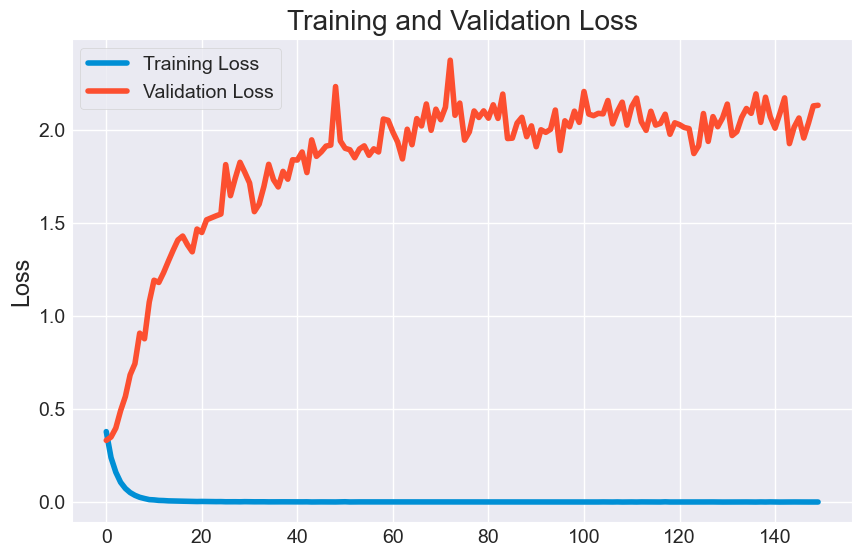

In [104]:
import matplotlib.pyplot as plt

# Extract loss history from the GRU model training
train_loss = gru_history.history['loss']
val_loss = gru_history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

# Plotting training and validation loss
plt.figure(figsize=(9, 6))
plt.plot(train_loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.legend()
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.show()


# Deep Learning
* Applying tokenizer for Bi-LSTM input after splitting data into training and testing/validation set.

In [105]:
from sklearn.model_selection import train_test_split
X = df["clean_review"]
y = df.sentiment
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
display(X_train.shape)
display(X_test.shape)

(75600,)

(25200,)

In [106]:
from tensorflow.keras.preprocessing.text import Tokenizer

from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [107]:
# using tokenizer to transform text messages into training and testing set
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [108]:
X_train_seq_padded = pad_sequences(X_train_seq, maxlen=64)
X_test_seq_padded = pad_sequences(X_test_seq, maxlen=64)

In [109]:
X_train_seq_padded[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     8,   249,     1,   142,    32,  2653, 26487,
          39,    67,   200,   101,    15,  1946,  2883,   101,    15,
        1946])

In [110]:
import json
# Save the tokenizer configuration to a file
tokenizer_path = "tokenizer_config.json"
tokenizer_json = tokenizer.to_json()

with open(tokenizer_path, 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))

### Bidirectional LSTM
* Structure and Parameters

In [111]:
# construct model
BATCH_SIZE = 64

#from keras.utils.vis_utils import plot_model
#from tensorflow.keras.utils import plot_model
#from keras.utils import plot_model

#model = Sequential()
#model.add(Embedding(len(tokenizer.index_word)+1,64))
#model.add(Bidirectional(LSTM(100, dropout=0,recurrent_dropout=0)))
#model.add(Dense(128, activation="relu"))
#model.add(Dense(1,activation="sigmoid"))

#model.compile("adam","binary_crossentropy",metrics=["accuracy"])
#model.fit(X_test_seq_padded, y_train, batch_size=BATCH_SIZE, epochs=5, validation_split=0.2)

#model.summary()
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.utils import plot_model

model = Sequential()
model.add(Embedding(len(tokenizer.index_word)+1, 64))
model.add(Bidirectional(LSTM(100, dropout=0, recurrent_dropout=0)))
model.add(Dense(128, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
histiry_lstm = model.fit(X_test_seq_padded, y_train, batch_size=BATCH_SIZE, epochs=200, validation_split=0.2)

model.summary()



Epoch 1/200
315/315 ━━━━━━━━━━━━━━━━━━━━ 25s 69ms/step - accuracy: 0.5077 - loss: 0.6934 - val_accuracy: 0.4948 - val_loss: 0.6932
Epoch 2/200
315/315 ━━━━━━━━━━━━━━━━━━━━ 22s 69ms/step - accuracy: 0.5931 - loss: 0.6835 - val_accuracy: 0.4960 - val_loss: 0.7050
Epoch 3/200
315/315 ━━━━━━━━━━━━━━━━━━━━ 23s 72ms/step - accuracy: 0.7571 - loss: 0.5120 - val_accuracy: 0.4925 - val_loss: 0.8369
Epoch 4/200
315/315 ━━━━━━━━━━━━━━━━━━━━ 22s 71ms/step - accuracy: 0.8934 - loss: 0.2599 - val_accuracy: 0.4940 - val_loss: 1.2010
Epoch 5/200
315/315 ━━━━━━━━━━━━━━━━━━━━ 22s 68ms/step - accuracy: 0.9538 - loss: 0.1228 - val_accuracy: 0.4881 - val_loss: 1.8517
Epoch 6/200
315/315 ━━━━━━━━━━━━━━━━━━━━ 22s 70ms/step - accuracy: 0.9751 - loss: 0.0638 - val_accuracy: 0.4919 - val_loss: 2.4432
Epoch 7/200
315/315 ━━━━━━━━━━━━━━━━━━━━ 24s 76ms/step - accuracy: 0.9869 - loss: 0.0375 - val_accuracy: 0.4903 - val_loss: 3.0719
Epoch 8/200
315/315 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step - accuracy: 0.9922 - loss: 0

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (64, 64, 64)           │     5,747,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (64, 200)              │       132,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (64, 128)              │        25,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (64, 1)                │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,714,981 (67.58 MB)

 Trainable params: 5,904,993 (22.53 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,809,988 (45.05 MB)

In [62]:
# Used for preventing overfitting
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor="val_loss",patience=5,verbose=True)

In [63]:
history = model.fit(X_train_seq_padded, y_train,batch_size=BATCH_SIZE,epochs=15,
                    validation_data=(X_test_seq_padded, y_test),callbacks=[early_stop])

Epoch 1/15
1182/1182 [==============================] - 157s 129ms/step - loss: 0.4943 - accuracy: 0.7435 - val_loss: 0.3712 - val_accuracy: 0.8415
Epoch 2/15
1182/1182 [==============================] - 155s 131ms/step - loss: 0.2563 - accuracy: 0.8977 - val_loss: 0.3671 - val_accuracy: 0.8498
Epoch 3/15
1182/1182 [==============================] - 167s 141ms/step - loss: 0.1594 - accuracy: 0.9387 - val_loss: 0.4139 - val_accuracy: 0.8381
Epoch 4/15
1182/1182 [==============================] - 153s 130ms/step - loss: 0.0961 - accuracy: 0.9649 - val_loss: 0.5793 - val_accuracy: 0.8177
Epoch 5/15
1182/1182 [==============================] - 151s 128ms/step - loss: 0.0583 - accuracy: 0.9794 - val_loss: 0.6979 - val_accuracy: 0.8265
Epoch 6/15
1182/1182 [==============================] - 150s 127ms/step - loss: 0.0369 - accuracy: 0.9875 - val_loss: 0.7689 - val_accuracy: 0.8242
Epoch 7/15
1182/1182 [==============================] - 150s 127ms/step - loss: 0.0240 - accuracy: 0.9921 - val_

In [64]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 64)          5747136   
                                                                 
 bidirectional_3 (Bidirecti  (None, 200)               132000    
 onal)                                                           
                                                                 
 dense_6 (Dense)             (None, 128)               25728     
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 5904993 (22.53 MB)
Trainable params: 5904993 (22.53 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [65]:
from sklearn.metrics import roc_auc_score
pred_train = model.predict(X_train_seq_padded)
pred_test = model.predict(X_test_seq_padded)
print('LSTM Recurrent Neural Network baseline: ' + str(roc_auc_score(y_train, pred_train)))
print('LSTM Recurrent Neural Network: ' + str(roc_auc_score(y_test, pred_test)))

788/788 [==============================] - 12s 16ms/step
LSTM Recurrent Neural Network baseline: 0.9998577356341408
LSTM Recurrent Neural Network: 0.8934697246421692


In [66]:
model.evaluate(X_test_seq_padded, y_test)

788/788 [==============================] - 13s 17ms/step - loss: 0.9047 - accuracy: 0.8232


[0.904744565486908, 0.8232142925262451]

Text(0.5, 1.0, 'Training and Validation Accuracy')

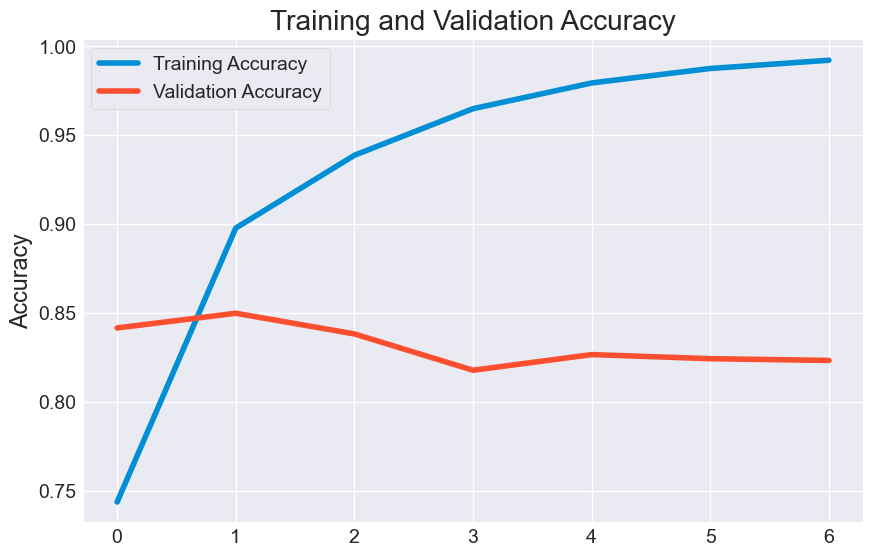

In [67]:
acc = history.history["accuracy"]
loss = history.history["loss"]

val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]

plt.figure(figsize=(9,6))
plt.plot(acc,label="Training Accuracy")
plt.plot(val_acc,label="Validation Accuracy")
plt.legend()
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")

* Since roc_auc_score of LSTM is best among all the models we trained, so **Bidirectional LSTM is the best model** among all the other ones which we have trained.

In [69]:
model.save("BiLSTM1.h5")

In [70]:
# construct model
from keras.layers import SimpleRNN

BATCH_SIZE = 64
model = Sequential()
model.add(Embedding(len(tokenizer.index_word)+1,64))
#model.add(Embedding(len(tokenizer.index_word) + 1,
#                    50,     # embeds it in a 50-dimensional vector
#                    input_length=max_len))
model.add(SimpleRNN(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train_seq_padded, y_train,batch_size=BATCH_SIZE,epochs=15,
                    validation_data=(X_test_seq_padded, y_test),callbacks=[early_stop])
model.summary()


Epoch 1/15
1182/1182 [==============================] - 77s 64ms/step - loss: 0.4419 - accuracy: 0.7877 - val_loss: 0.3760 - val_accuracy: 0.8422
Epoch 2/15
1182/1182 [==============================] - 71s 60ms/step - loss: 0.2667 - accuracy: 0.8930 - val_loss: 0.4183 - val_accuracy: 0.8157
Epoch 3/15
1182/1182 [==============================] - 75s 63ms/step - loss: 0.1338 - accuracy: 0.9506 - val_loss: 0.5341 - val_accuracy: 0.7880
Epoch 4/15
1182/1182 [==============================] - 78s 66ms/step - loss: 0.0613 - accuracy: 0.9787 - val_loss: 0.6861 - val_accuracy: 0.7985
Epoch 5/15
1182/1182 [==============================] - 75s 63ms/step - loss: 0.0354 - accuracy: 0.9871 - val_loss: 0.8387 - val_accuracy: 0.7992
Epoch 6/15
1182/1182 [==============================] - 79s 67ms/step - loss: 0.0244 - accuracy: 0.9916 - val_loss: 0.9495 - val_accuracy: 0.8084
Epoch 6: early stopping
Model: "sequential_4"
_________________________________________________________________
 Layer (type

In [71]:
pred_train = model.predict(X_train_seq_padded)
pred_test = model.predict(X_test_seq_padded)
print('RNN Recurrent Neural Network baseline: ' + str(roc_auc_score(y_train, pred_train)))
print('RNN Recurrent Neural Network: ' + str(roc_auc_score(y_test, pred_test)))

788/788 [==============================] - 4s 5ms/step
RNN Recurrent Neural Network baseline: 0.9998506770237575
RNN Recurrent Neural Network: 0.8713702023428166


In [72]:
model.evaluate(X_test_seq_padded, y_test)

788/788 [==============================] - 4s 6ms/step - loss: 0.9495 - accuracy: 0.8084


[0.9495016932487488, 0.8083730340003967]

Text(0.5, 1.0, 'Training and Validation Accuracy')

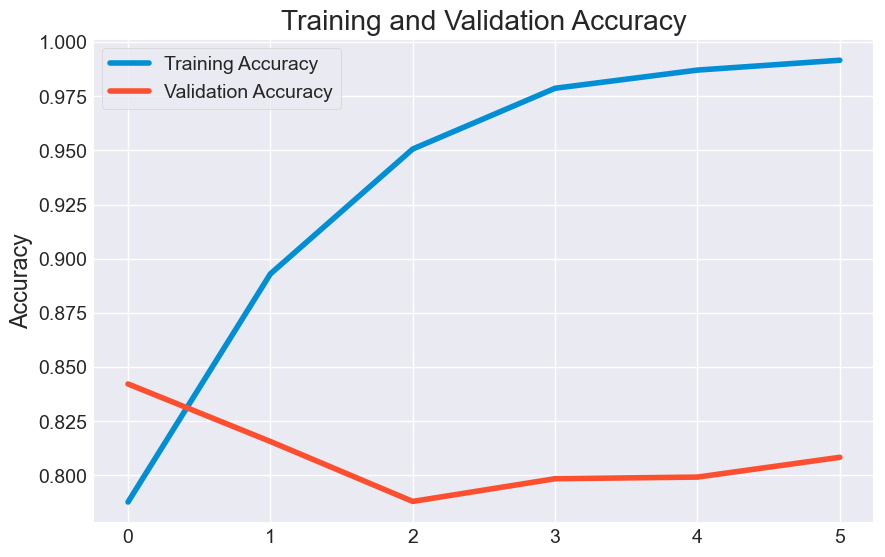

In [73]:
acc = history.history["accuracy"]
loss = history.history["loss"]

val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]

plt.figure(figsize=(9,6))
plt.plot(acc,label="Training Accuracy")
plt.plot(val_acc,label="Validation Accuracy")
plt.legend()
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")

In [105]:
model.save("RNN1.h5")

In [112]:
#github Repository: https://github.com/AsadAli2k18/sentiment-analysis-on-Amazon-reviews-and-evaluation